In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn as sl

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder   
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data=pd.read_csv("marketing_customer_analysis.csv")

In [3]:
data.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
1151,MF53477,California,3600.934326,Yes,Basic,High School or Below,2/25/11,Retired,F,25147,Suburban,Single,101,7,54,0,1,Corporate Auto,Corporate L1,Offer1,Agent,694.598288,SUV,Medsize
3339,ZL17677,Washington,21480.817810,No,Basic,Master,2/10/11,Medical Leave,F,15505,Suburban,Married,68,24,2,0,2,Personal Auto,Personal L2,Offer2,Agent,383.890867,Two-Door Car,Large
5388,WD87578,Nevada,7821.188278,No,Premium,High School or Below,2/8/11,Unemployed,F,0,Suburban,Single,109,31,74,0,3,Personal Auto,Personal L2,Offer2,Call Center,784.800000,Four-Door Car,Medsize
830,WI69346,California,8960.280213,No,Basic,Master,1/17/11,Employed,F,71943,Urban,Single,112,8,51,0,4,Corporate Auto,Corporate L2,Offer3,Agent,305.653785,SUV,Medsize
3366,ZE71012,Nevada,26199.527070,No,Basic,Bachelor,1/6/11,Employed,M,20346,Suburban,Married,74,13,57,0,2,Corporate Auto,Corporate L2,Offer3,Agent,358.643521,Two-Door Car,Medsize
7171,CP99334,Oregon,3142.811610,No,Extended,College,1/30/11,Employed,F,60108,Suburban,Married,78,0,63,0,1,Personal Auto,Personal L3,Offer1,Agent,507.060901,Four-Door Car,Medsize
7808,CH50584,Oregon,32474.769770,No,Basic,High School or Below,1/22/11,Employed,M,71449,Suburban,Divorced,102,17,7,0,2,Personal Auto,Personal L3,Offer4,Call Center,734.400000,SUV,Small
4635,XX31571,Washington,16728.343860,No,Extended,High School or Below,1/15/11,Unemployed,M,0,Suburban,Single,237,1,29,0,5,Personal Auto,Personal L1,Offer3,Agent,1706.400000,Luxury Car,Medsize
5518,BM71358,Arizona,10787.115720,No,Extended,High School or Below,1/3/11,Employed,M,44695,Rural,Divorced,91,26,88,0,2,Personal Auto,Personal L3,Offer1,Call Center,147.954285,Four-Door Car,Medsize
4760,YW72997,Arizona,7196.721128,No,Basic,High School or Below,1/8/11,Unemployed,M,0,Suburban,Single,107,22,96,0,4,Personal Auto,Personal L2,Offer4,Web,770.400000,SUV,Medsize


In [4]:
#Show DataFrame info.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
#changing columns names

data_cols=data.columns

In [6]:
cols = [col_name.lower().replace(' ', '_') for col_name in data_cols]
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [7]:
data.columns=cols 

In [8]:
#Changing "employmentstatus" column to "employment_status"

data.rename(columns={"employmentstatus": "employment_status"}, inplace=True)

In [9]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
#Checking for Nulls
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [11]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [12]:
#Dataframe with numerical data

numerical = data.select_dtypes(include=np.number)
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [13]:
#Dataframe with categorical data

categorical = data.select_dtypes(include=np.object)
categorical.head()

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# Numerical

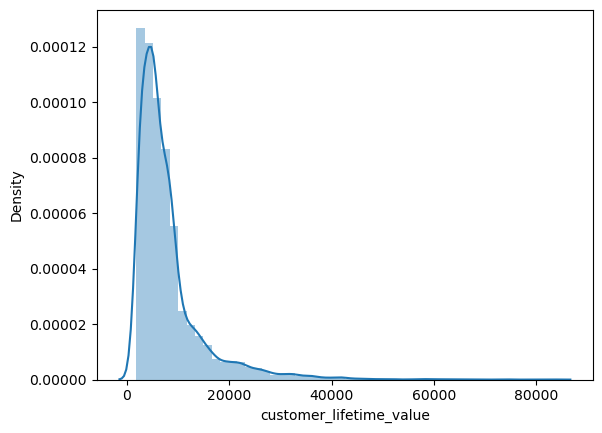

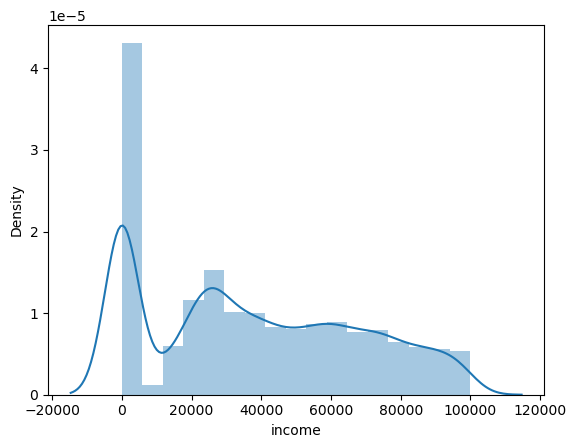

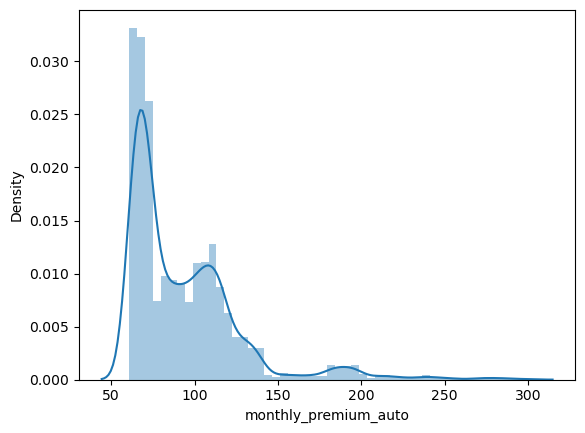

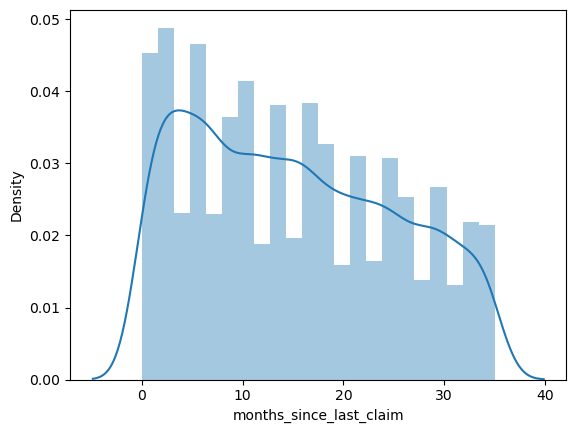

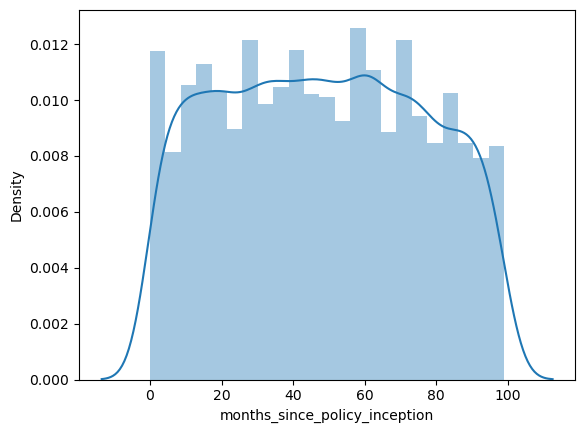

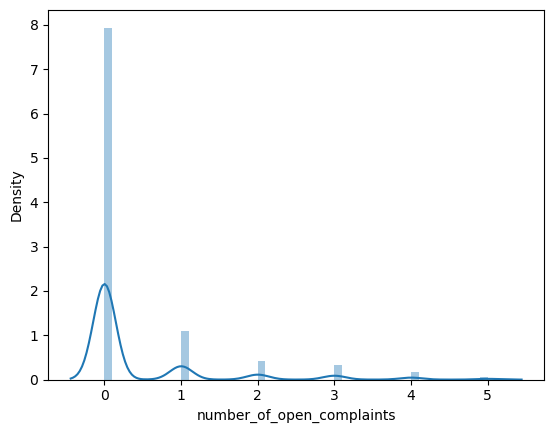

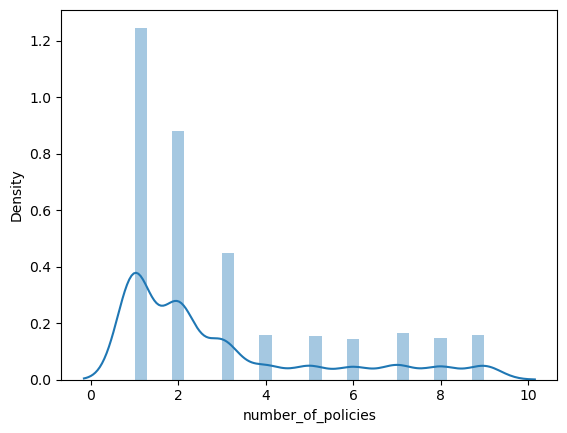

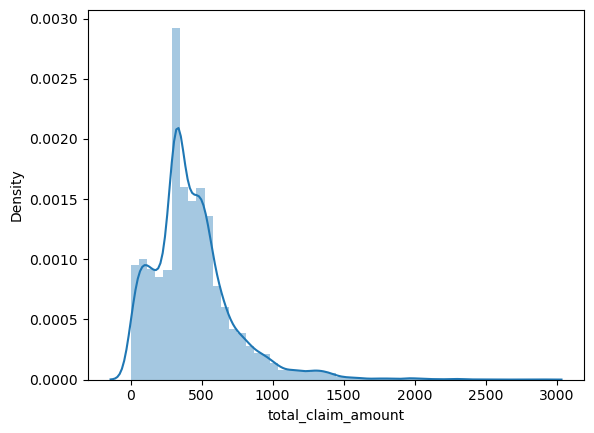

In [14]:
# Plotting distribution of numerical

for column in numerical.columns:
    sns.distplot(data[column])
    plt.show()

Only "costumer_lifetime_value" follows distribution which skewed to the right.
All the others are neither symmetric or normal.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'customer_lifetime_value'),
  Text(1, 0, 'income'),
  Text(2, 0, 'monthly_premium_auto'),
  Text(3, 0, 'months_since_last_claim'),
  Text(4, 0, 'months_since_policy_inception'),
  Text(5, 0, 'number_of_open_complaints'),
  Text(6, 0, 'number_of_policies'),
  Text(7, 0, 'total_claim_amount')])

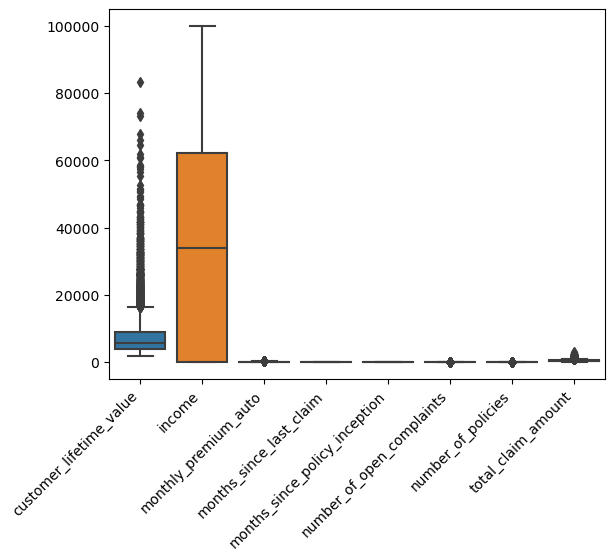

In [15]:
#checking outliers

sns.boxplot(data=numerical)
plt.xticks(rotation=45, ha='right')

We can see that "Customer Lifetime Value" has many outliers.


In [16]:
#Remove outliers

iqr = np.percentile(numerical["customer_lifetime_value"],75) - np.percentile(numerical["customer_lifetime_value"],25)
iqr

4967.915247000001

In [17]:
# Define the limits

upper_limit = np.percentile(numerical["customer_lifetime_value"],75) + 1.5*iqr    
lower_limit = np.percentile(numerical["customer_lifetime_value"],25) - 1.5*iqr
upper_limit, lower_limit

(16414.039911750002, -3457.6210762500014)

In [18]:
# remove them from the data

numerical= numerical[(numerical["customer_lifetime_value"]>lower_limit) & (numerical['customer_lifetime_value']<upper_limit)]

In [19]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

#1. SPLITTING DATA: Separate the Target "total_claim_amount" from numerical dataset into Y.

y = numerical["total_claim_amount"]
X = numerical.drop(["total_claim_amount"], axis=1)

In [21]:
#Creating a Correlation plot:

correlations_matrix = numerical.corr(method="spearman")
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.064991,0.463262,-0.004070,-0.003877,-0.028022,0.558922,0.202153
income,0.064991,1.000000,-0.023675,-0.030373,0.000635,0.000291,-0.012425,-0.403977
monthly_premium_auto,0.463262,-0.023675,1.000000,-0.009248,0.011643,-0.013548,-0.015646,0.512423
months_since_last_claim,-0.004070,-0.030373,-0.009248,1.000000,-0.050620,0.009575,0.011110,-0.005235
months_since_policy_inception,-0.003877,0.000635,0.011643,-0.050620,1.000000,-0.013424,-0.010111,-0.012013
number_of_open_complaints,-0.028022,0.000291,-0.013548,0.009575,-0.013424,1.000000,0.002391,-0.021330
number_of_policies,0.558922,-0.012425,-0.015646,0.011110,-0.010111,0.002391,1.000000,-0.019704
total_claim_amount,0.202153,-0.403977,0.512423,-0.005235,-0.012013,-0.021330,-0.019704,1.000000


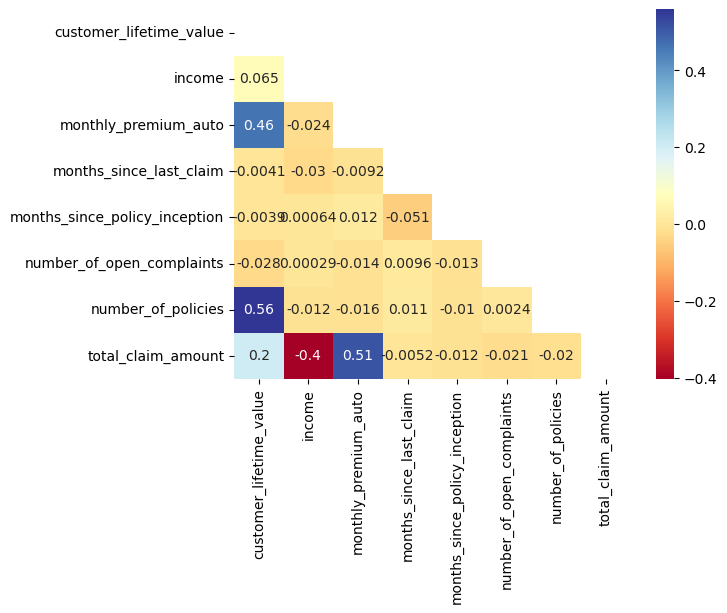

In [22]:
mask = np.zeros_like(correlations_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations_matrix, annot=True, mask=mask,cmap='RdYlBu')
plt.show()

The highest correlation is 0.56 (between "customer_lifetime_value" and "number of policies").

Because of this high correlations, I am going to remove "number_of_policies" because is less correlated with the target "total_claim_amount".

I am also going to remove "number_of_open_complaints" because of it's abnormal distribution. 

In [24]:
#Remove insignificant variables or high correlated variables

X = X.drop (columns = ["number_of_policies", "number_of_open_complaints"], axis = 1)
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,2763.519279,56274,69,32,5
1,6979.535903,0,94,13,42
2,12887.431650,48767,108,18,38
3,7645.861827,0,106,18,65
4,2813.692575,43836,73,12,44


# Box-Cox Transformation

In [25]:
data_trans = X.copy()

def boxcox_transform(data):
    numeric_cols = data_trans.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        data_trans[column] = np.where(data_trans[column]<=0, np.NAN, data_trans[column]) 
        data_trans[column] = data_trans[column].fillna(data_trans[column].mean())
        transformed_data, ci = stats.boxcox(data_trans[column])
        data_trans[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci
data, _ci = boxcox_transform(data_trans)
data_trans.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,7.441311,1235.380140,0.668000,10.743839,3.011432
1,8.251168,1156.699330,0.668442,5.758852,18.670642
2,8.780661,1132.726306,0.668584,7.275882,17.290891
3,8.330224,1156.699330,0.668566,7.275882,25.985723
4,7.457154,1061.871385,0.668096,5.426459,19.346187


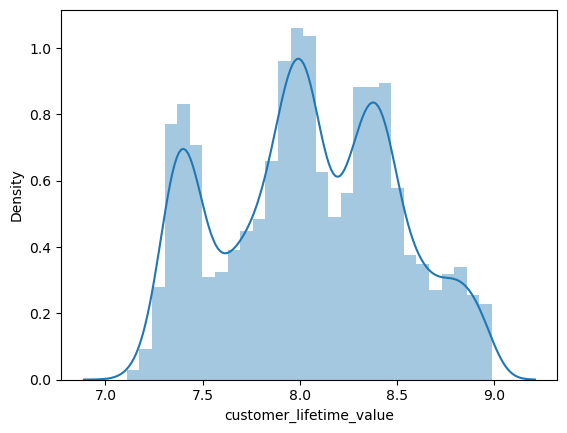

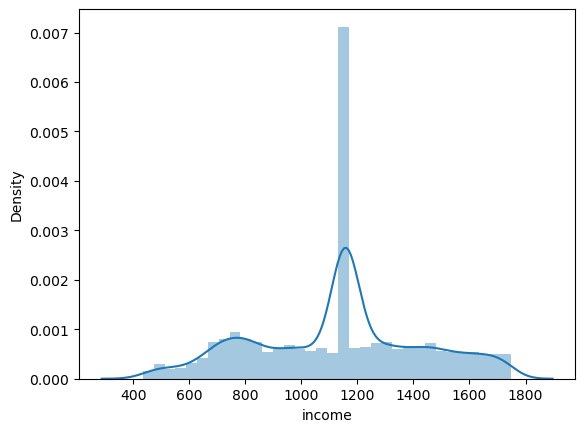

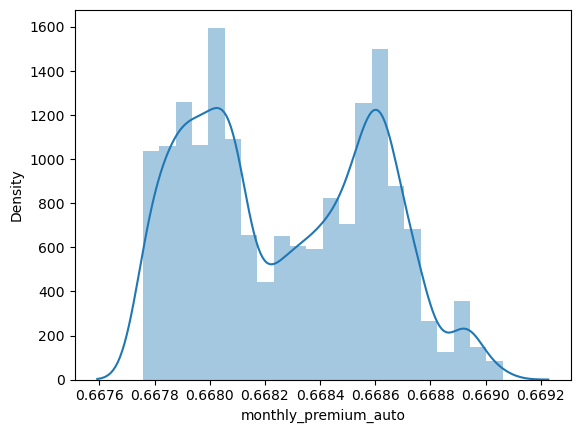

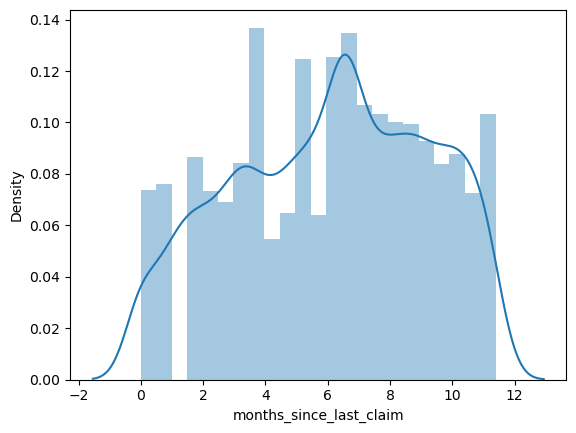

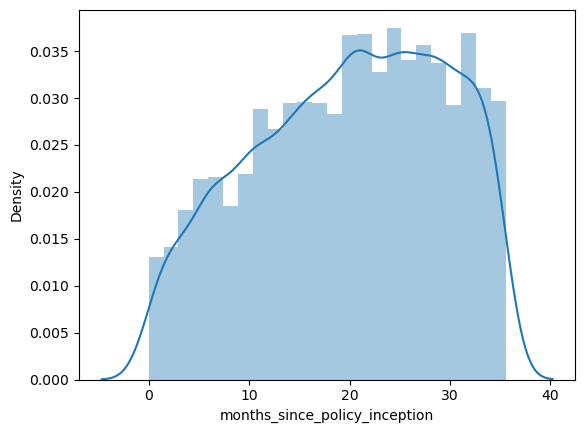

In [26]:
# See the changes in the distributions
for column in data_trans.select_dtypes(np.number).columns:
    sns.distplot(data_trans[column])
    plt.show()

In [28]:
#DATA SCALING

#(StandardScaler: For each feature to have mean=0 and standard-deviation = 1.)
#transformer = StandardScaler().fit_transform(X)
#transformer

In [29]:
#Transforming "transformer" array to a DataFrame

#X= pd.DataFrame(transformer, columns = X.columns)


In [30]:
#MinMaxScaler(): scaling data to the range of 0 and 1.

#X_scale = MinMaxScaler().fit(X) 
#x_minmax = X_scale.transform(X) 
#x_minmax

In [31]:
#Transform x_minmax to a DataFrame

#X_normalize = pd.DataFrame(x_minmax,columns=X.columns)
#X_normalize.head() 

# Categorical

In [32]:
# One Hot/Label Encoding (categorical).

categorical.head()

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [33]:
#Drop customer and effective_to_date column first

categorical2 = categorical.drop (columns = ["customer", "effective_to_date"], axis = 1)
categorical2.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [34]:
#Encoding using ONEHOTENCODER

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categorical2)

OneHotEncoder(drop='first')

In [35]:
encoded = encoder.transform(categorical2).toarray() 
cat_encoded = pd.DataFrame(encoded)

In [36]:
cat_encoded.columns = encoder.get_feature_names_out()
cat_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
#Concat DataFrames
dataconc = pd.concat([data_trans, cat_encoded], axis = 1)
dataconc.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,7.441311,1235.380140,0.668000,10.743839,3.011432,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,8.251168,1156.699330,0.668442,5.758852,18.670642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8.780661,1132.726306,0.668584,7.275882,17.290891,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,8.330224,1156.699330,0.668566,7.275882,25.985723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,7.457154,1061.871385,0.668096,5.426459,19.346187,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
# Removing nulls from dataconc otherwise train-test split won't work with null values.

dataconc2 = dataconc.dropna()

# Modeling 

In [42]:
# Train-test split. Spliting TARAGET and INDEPENDENT Variables, one for training and one for testing.


X_train, X_test, y_train , y_test = train_test_split(dataconc2, y, test_size=0.25, random_state=42)


In [43]:
#Apply Linear Regression.

#Training now just the data set, not the test.

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
#Predicting on X_test

predictions  = model.predict(X_test)
predictions

array([228.038041  , 239.7456084 , 288.64321664, ..., 219.9222476 ,
       502.70115111, 455.96515031])

# Evaluate the Model

In [45]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.7595978023552712
RMSE =  136.21062605333842
MSE =  18553.334649842393


In [46]:
numerical["total_claim_amount"].describe()

count    8317.000000
mean      423.041312
std       275.674499
min         0.099007
25%       268.471802
50%       374.400000
75%       542.400000
max      2893.239678
Name: total_claim_amount, dtype: float64

R2 is 0,75 therefore close to 1. The closer the r-squared value is to 1, the better the fit.

RMSE 136. Min value is 0, and max value is 2894 therefore 186 is good.   

RMSE estimates the deviation of the actual y-values from the regression line. RMSE is a metric to evalate model performance.

In [48]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
8119,192.859737,228.038041,35.178304
801,251.334247,239.745608,11.588639
8277,230.849720,288.643217,57.793497
6135,457.783791,464.820160,7.036369
2543,667.200000,627.741699,39.458301
...,...,...,...
1721,487.736171,489.271151,1.534980
7949,345.600000,370.574615,24.974615
4850,321.789644,219.922248,101.867396
4245,379.209349,502.701151,123.491802


<AxesSubplot:xlabel='true', ylabel='pred'>

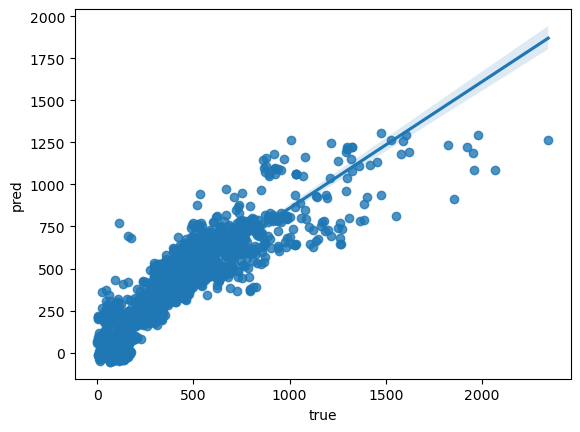

In [49]:
#Represent results

sns.regplot(results['true'], results['pred'])
#dark spots are the predicted.